In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/training_set.csv')

In [4]:
df.shape

(614, 13)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()} missing values")

Loan_ID: 0 missing values
Gender: 15 missing values
Married: 3 missing values
Dependents: 15 missing values
Education: 1 missing values
Self_Employed: 32 missing values
ApplicantIncome: 2 missing values
CoapplicantIncome: 1 missing values
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values
property_Area: 0 missing values
Loan_Status: 0 missing values


In [10]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

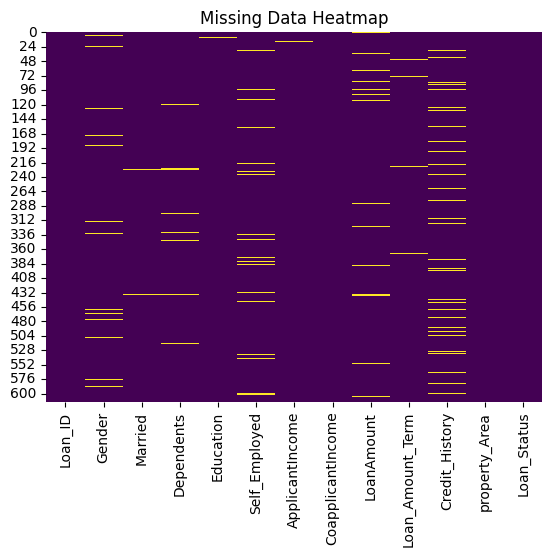

In [14]:
# Visualize the missing data using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,15
Married,3
Dependents,15
Education,1
Self_Employed,32
ApplicantIncome,2
CoapplicantIncome,1
LoanAmount,22
Loan_Amount_Term,14


In [9]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


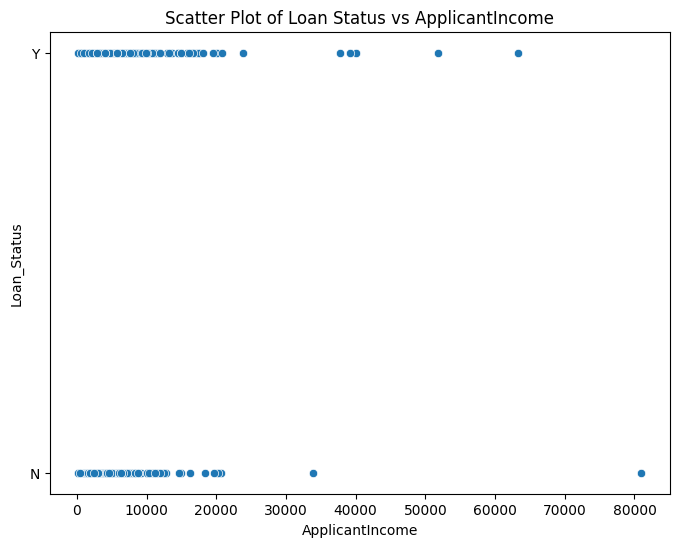

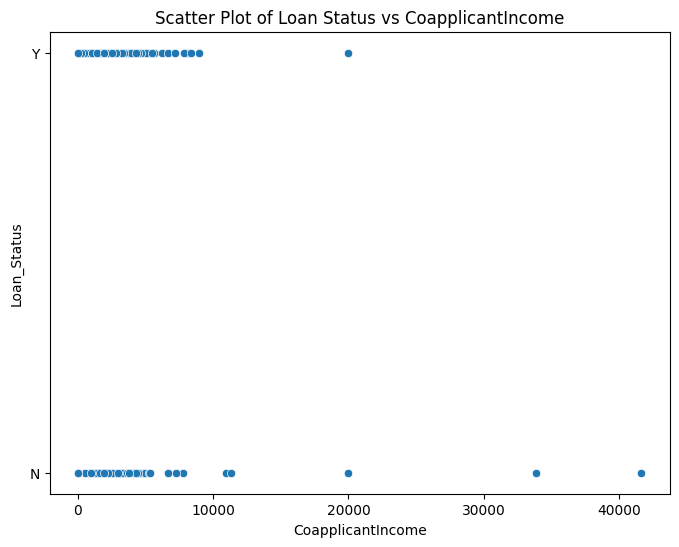

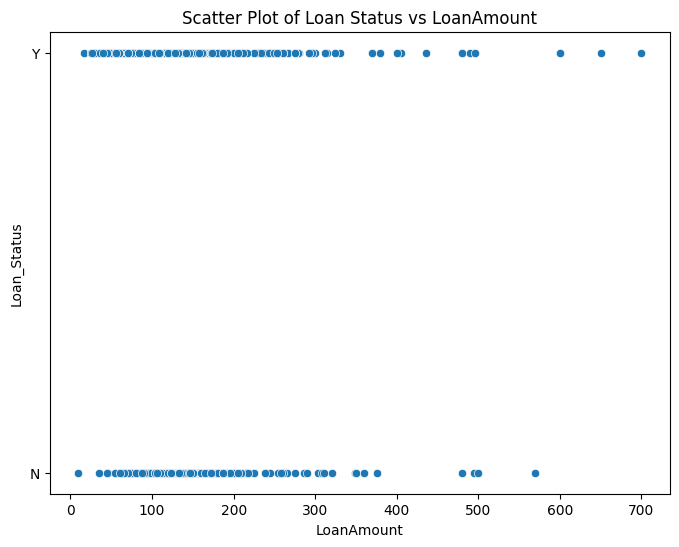

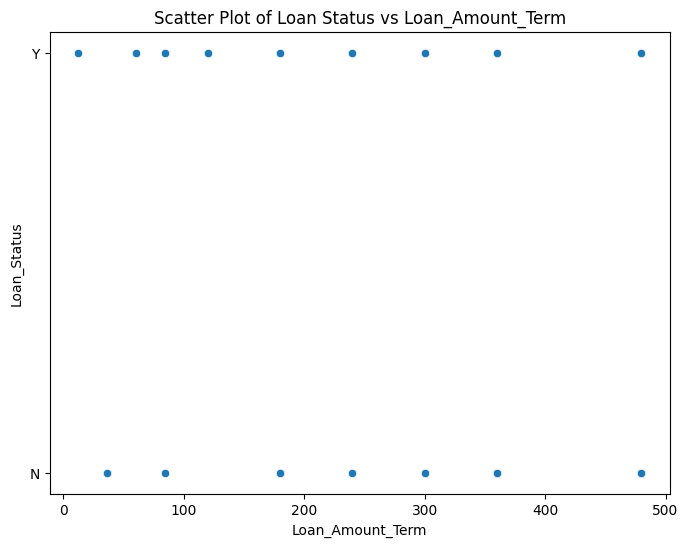

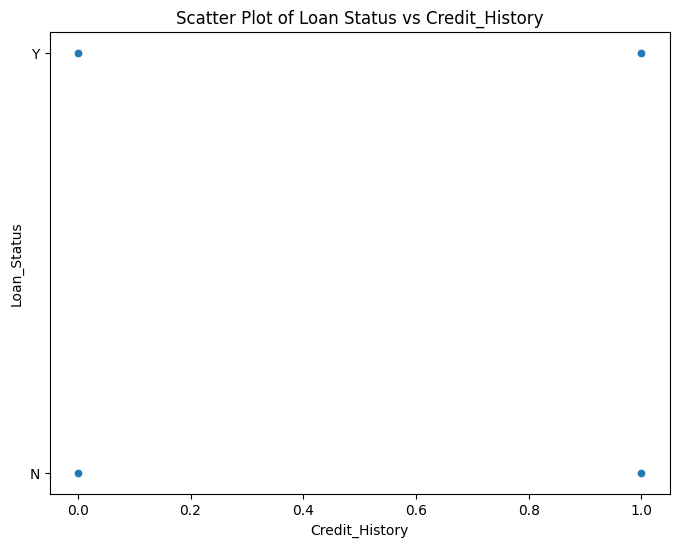

In [17]:
# Scatter Plots
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Loan_Status', data=df)
    plt.title(f'Scatter Plot of Loan Status vs {col}')
    plt.show()


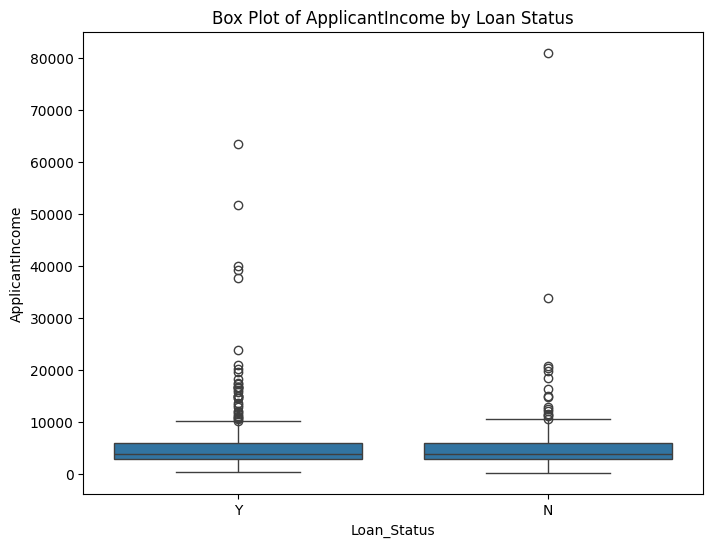

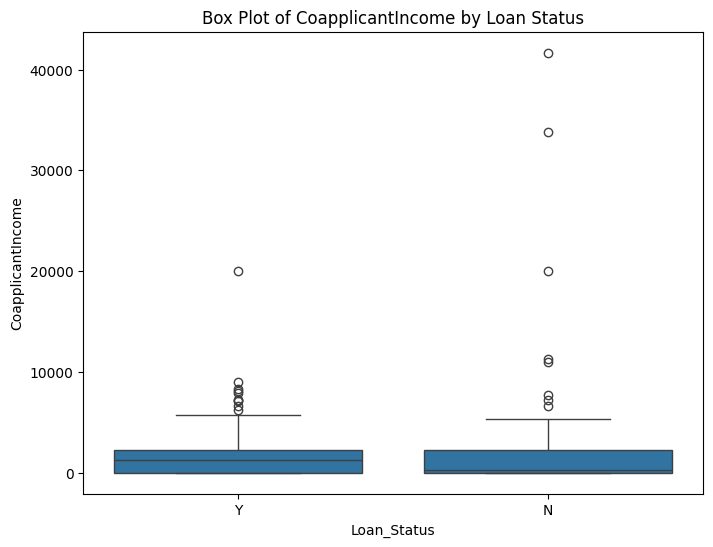

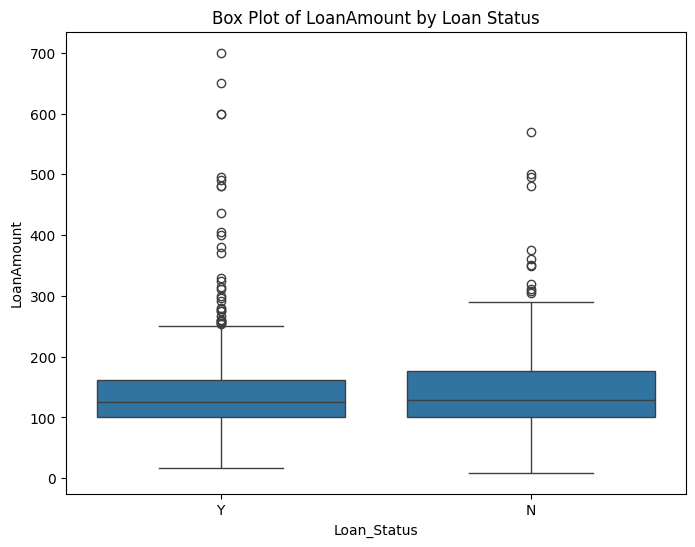

In [18]:
# Box Plots
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'Box Plot of {col} by Loan Status')
    plt.show()


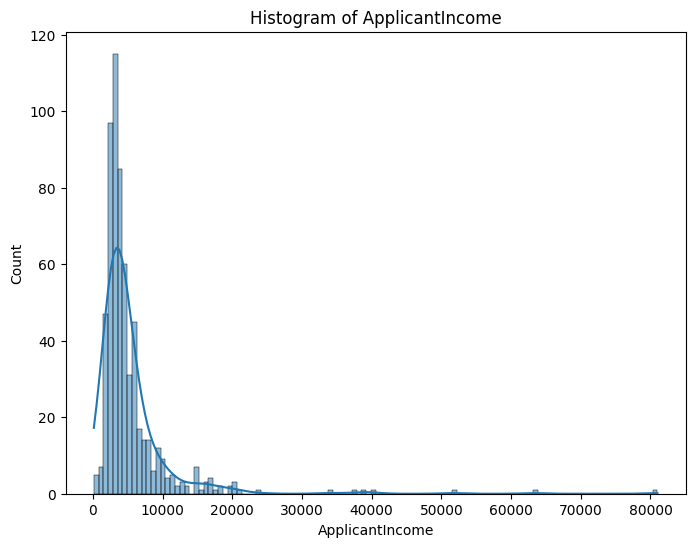

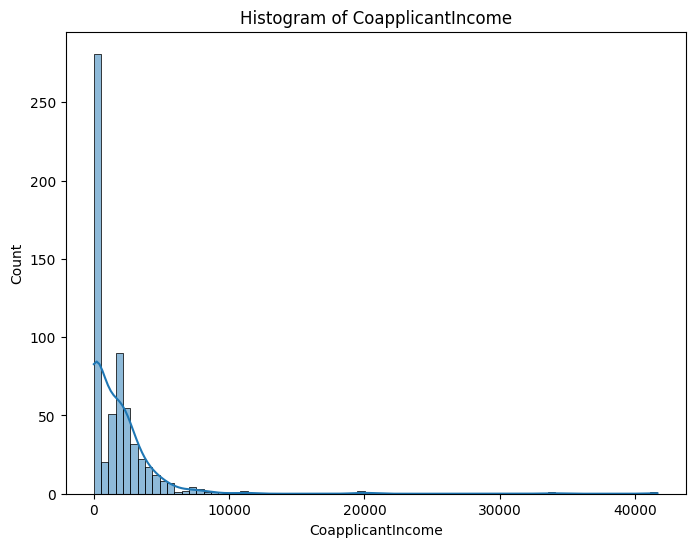

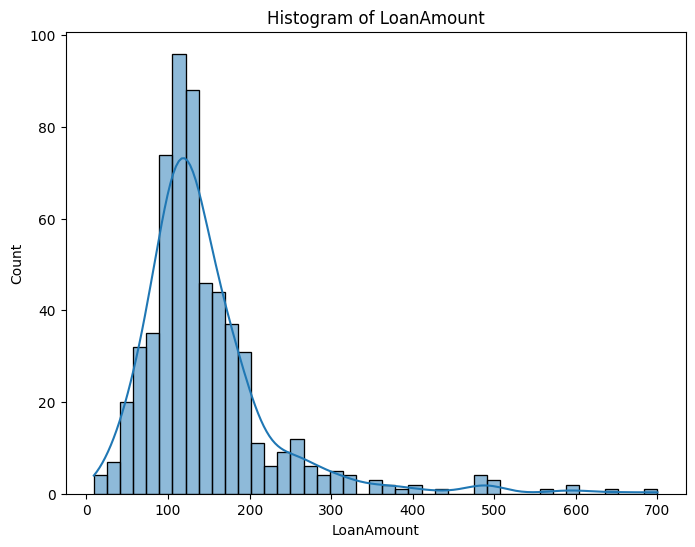

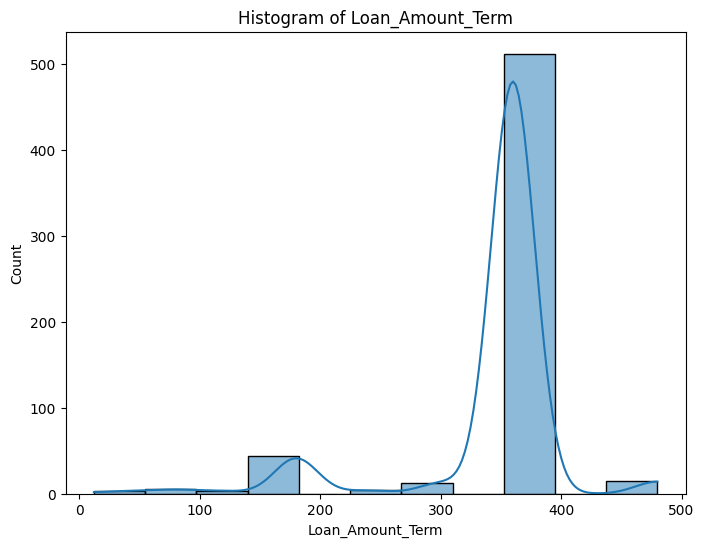

In [19]:
# Histograms
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


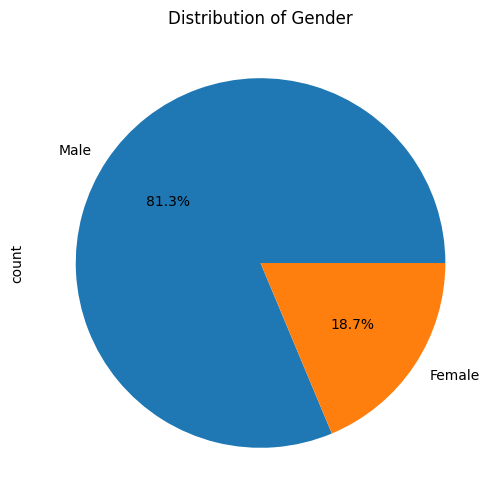

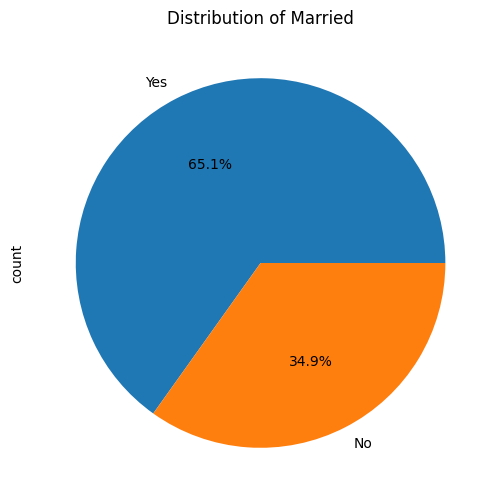

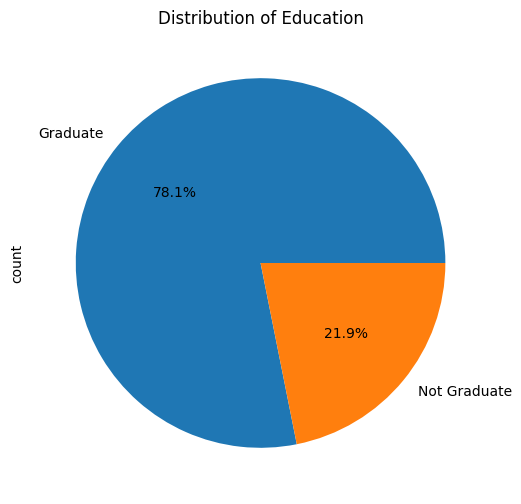

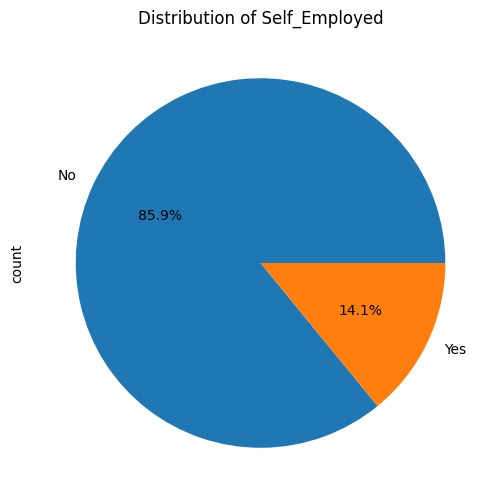

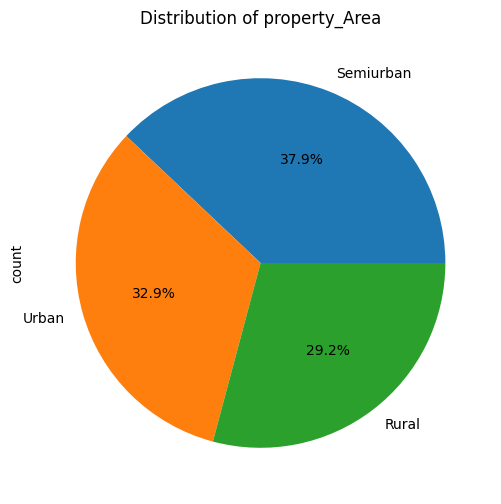

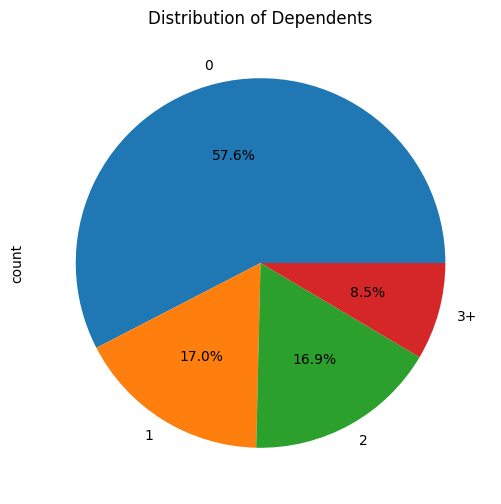

In [20]:

# Pie Charts for categorical features
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'property_Area', 'Dependents']:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()



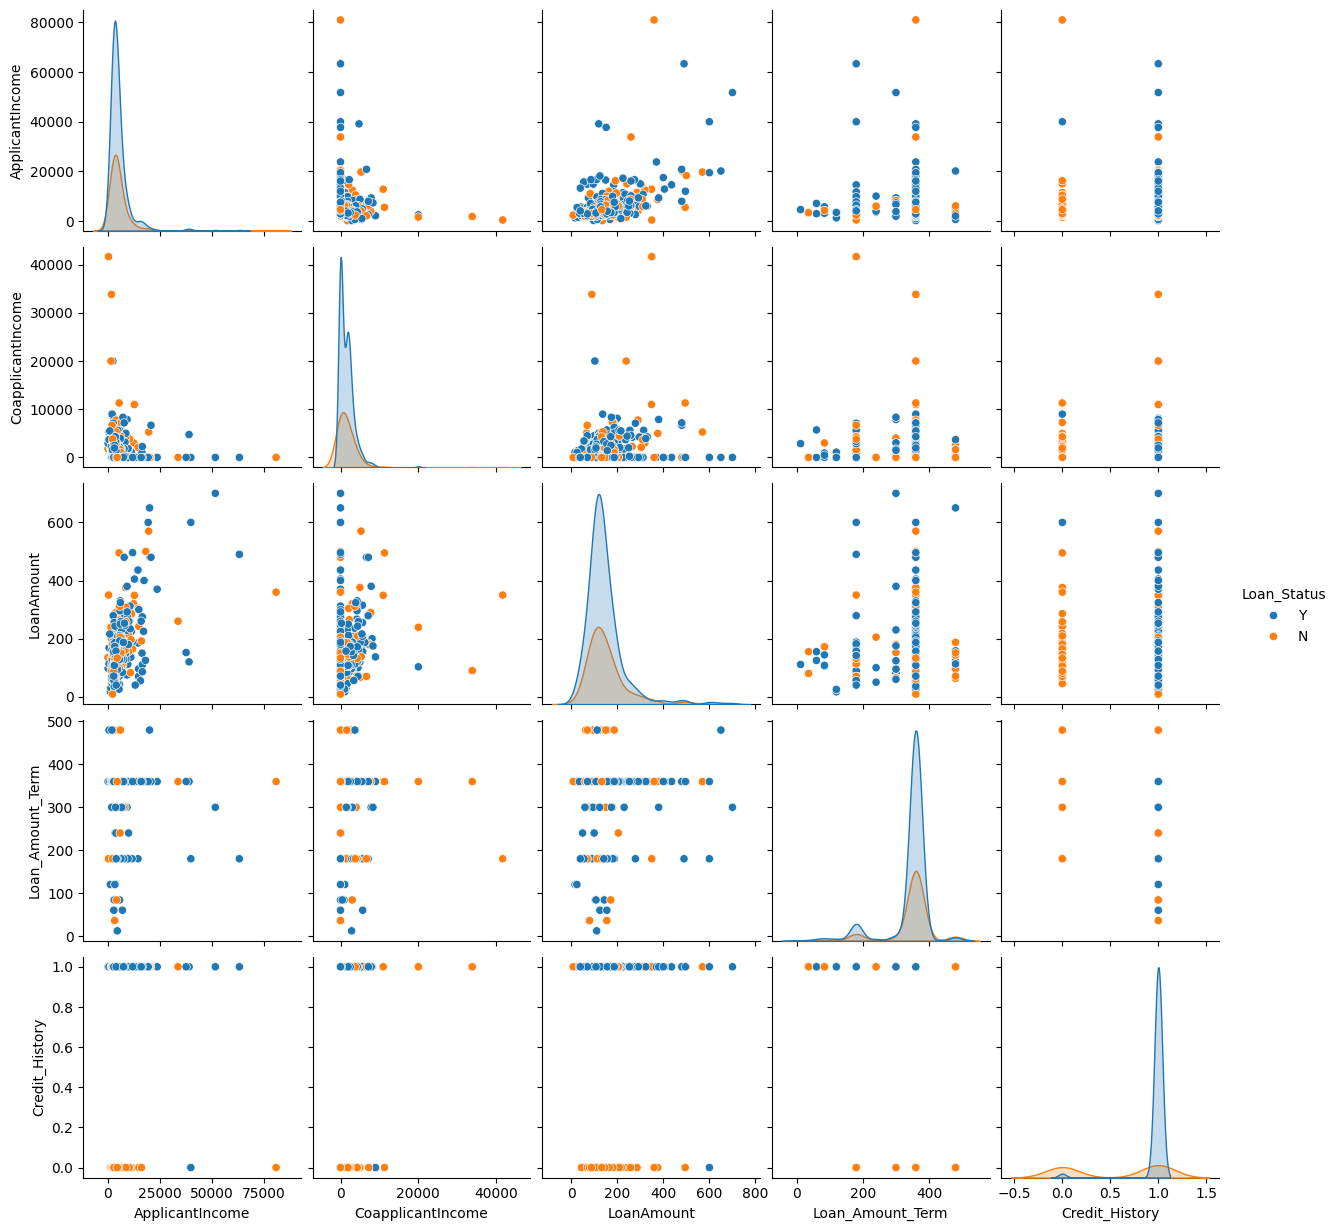

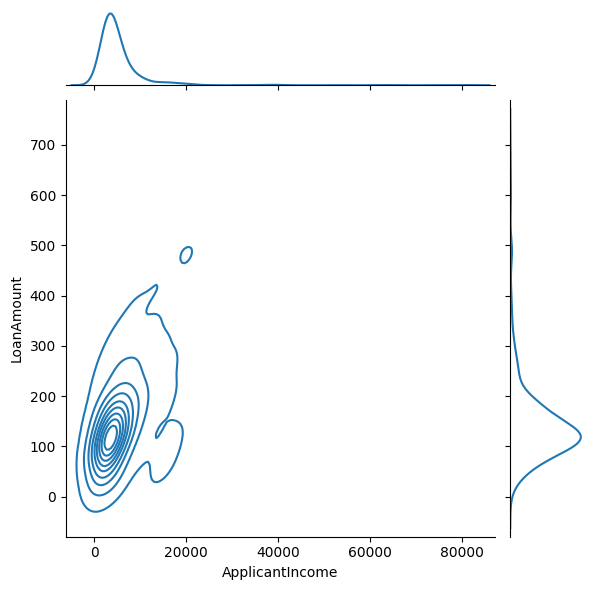

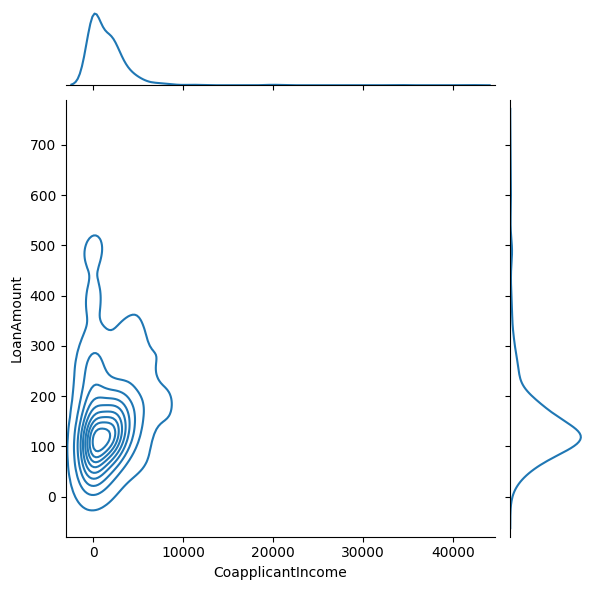

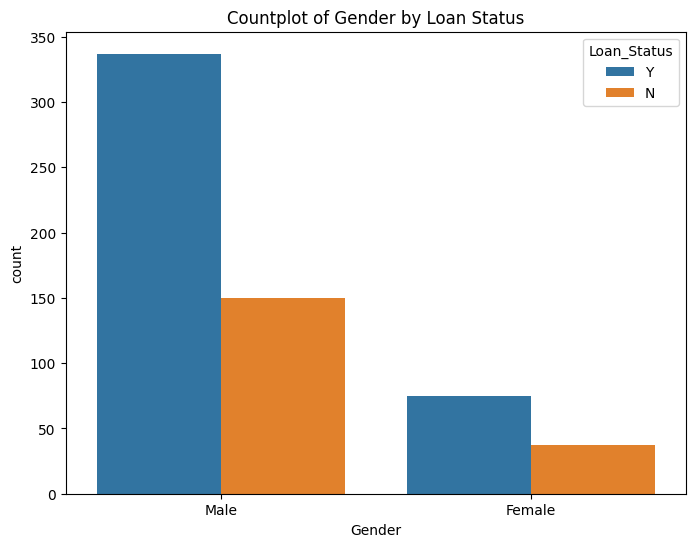

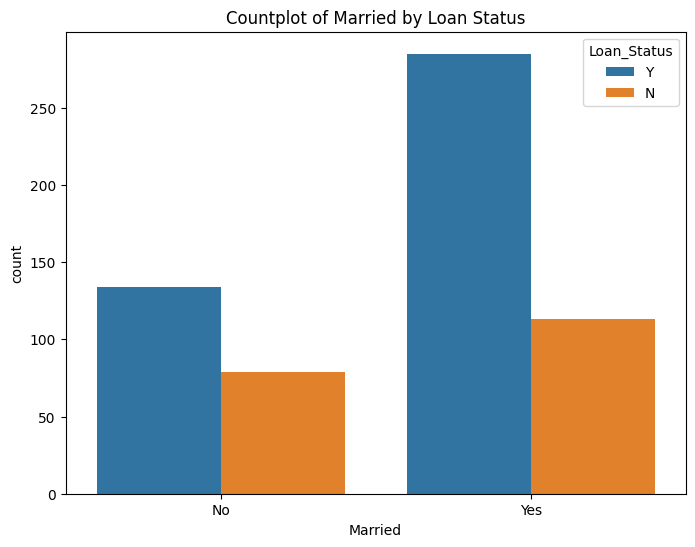

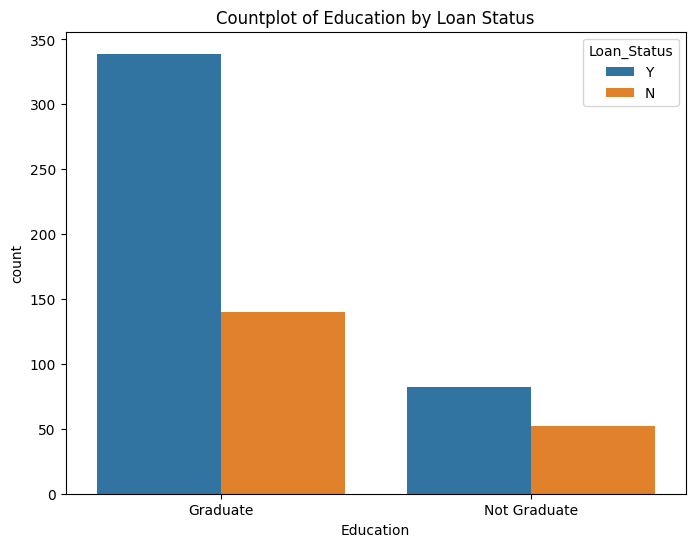

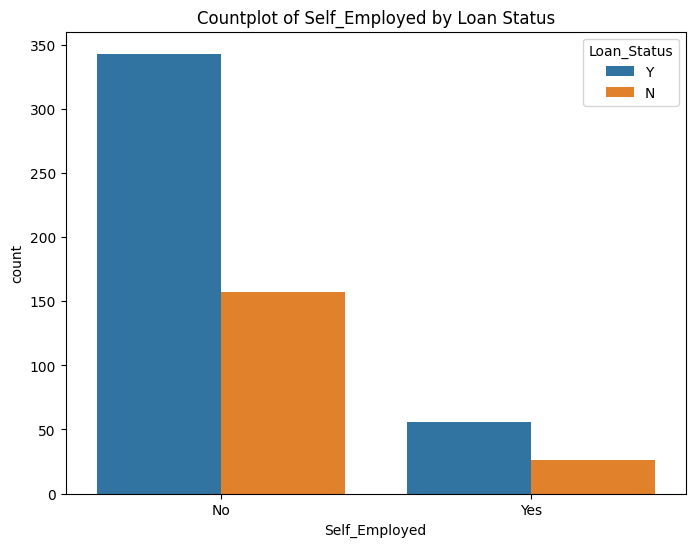

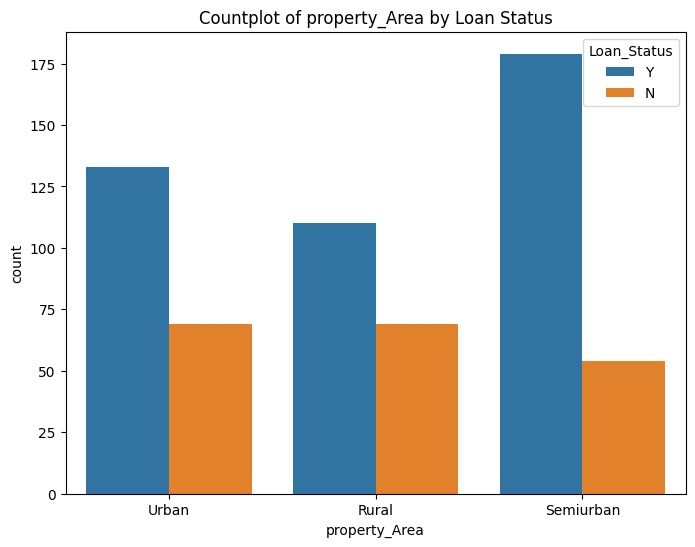

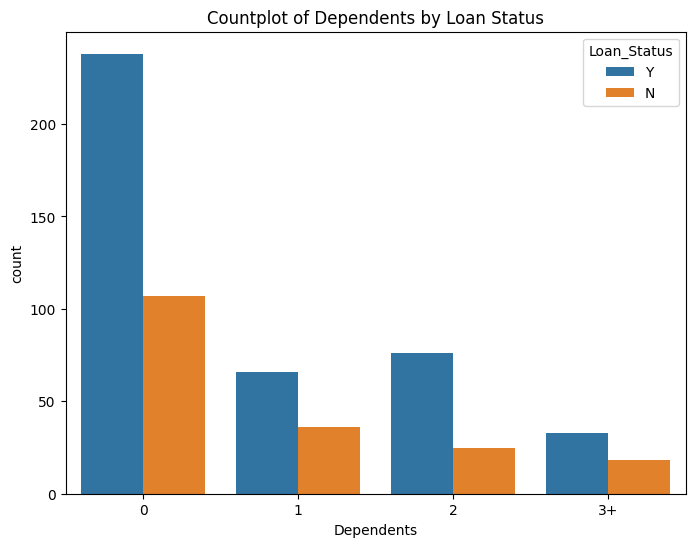

In [21]:
# Pairplot for selected numerical features
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.show()

# Jointplot for specific feature combinations
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=df, kind='kde')
plt.show()
sns.jointplot(x='CoapplicantIncome', y='LoanAmount', data=df, kind='kde')
plt.show()


# Countplot for categorical features
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'property_Area', 'Dependents']:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Countplot of {col} by Loan Status')
    plt.show()